# **Question 3**


You are required to write code to  create a decision tree (DT) model using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:

*	Importing required libraries
*	Loading Data
*	Feature Selection
*	Splitting Data
*	Building Decision Tree Model
*	Evaluating Model
*	Visualizing Decision Trees

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Pandas options
pd.set_option('display.max_colwidth', 500, 'display.max_rows', None, 'display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Data

In [ ]:
#Loading Data
data = pd.read_csv('loan_precheck_db.csv')

# Feature Selection

In [ ]:
# Find correlation

def data_correlation():
    # Read loaded dataset
    df = new_df2

    # Finding the correlation of the dataset 
    correlations = df.corr()
    print(correlations)

    # Function - Get features > treshold
    def get_features(correlation_threshold):
        abs_corrs = correlations.abs()
        high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
        return high_correlations

    # Corr > 0.25
    features = get_features(0.7) 
    print(features) 
    x = df[features] 
    y = df['loan_status']

    return df

In [ ]:
new_df2 = data
df = data_correlation()

                                  id  loan_amnt  funded_amnt  installment  \
id                          1.000000  -0.027323    -0.027323    -0.026106   
loan_amnt                  -0.027323   1.000000     1.000000     0.947029   
funded_amnt                -0.027323   1.000000     1.000000     0.947029   
installment                -0.026106   0.947029     0.947029     1.000000   
annual_inc                  0.006335   0.173712     0.173712     0.170226   
dti                         0.009189   0.057111     0.057111     0.063912   
delinq_2yrs                 0.011337  -0.002755    -0.002755     0.013348   
fico_range_low              0.003308   0.060253     0.060253    -0.004793   
fico_range_high             0.003306   0.060256     0.060256    -0.004785   
inq_last_6mths             -0.000279  -0.043725    -0.043725    -0.026603   
open_acc                   -0.002171   0.151064     0.151064     0.148043   
pub_rec                    -0.004813  -0.058920    -0.058920    -0.050609   



<---------------Heatmap------------------>


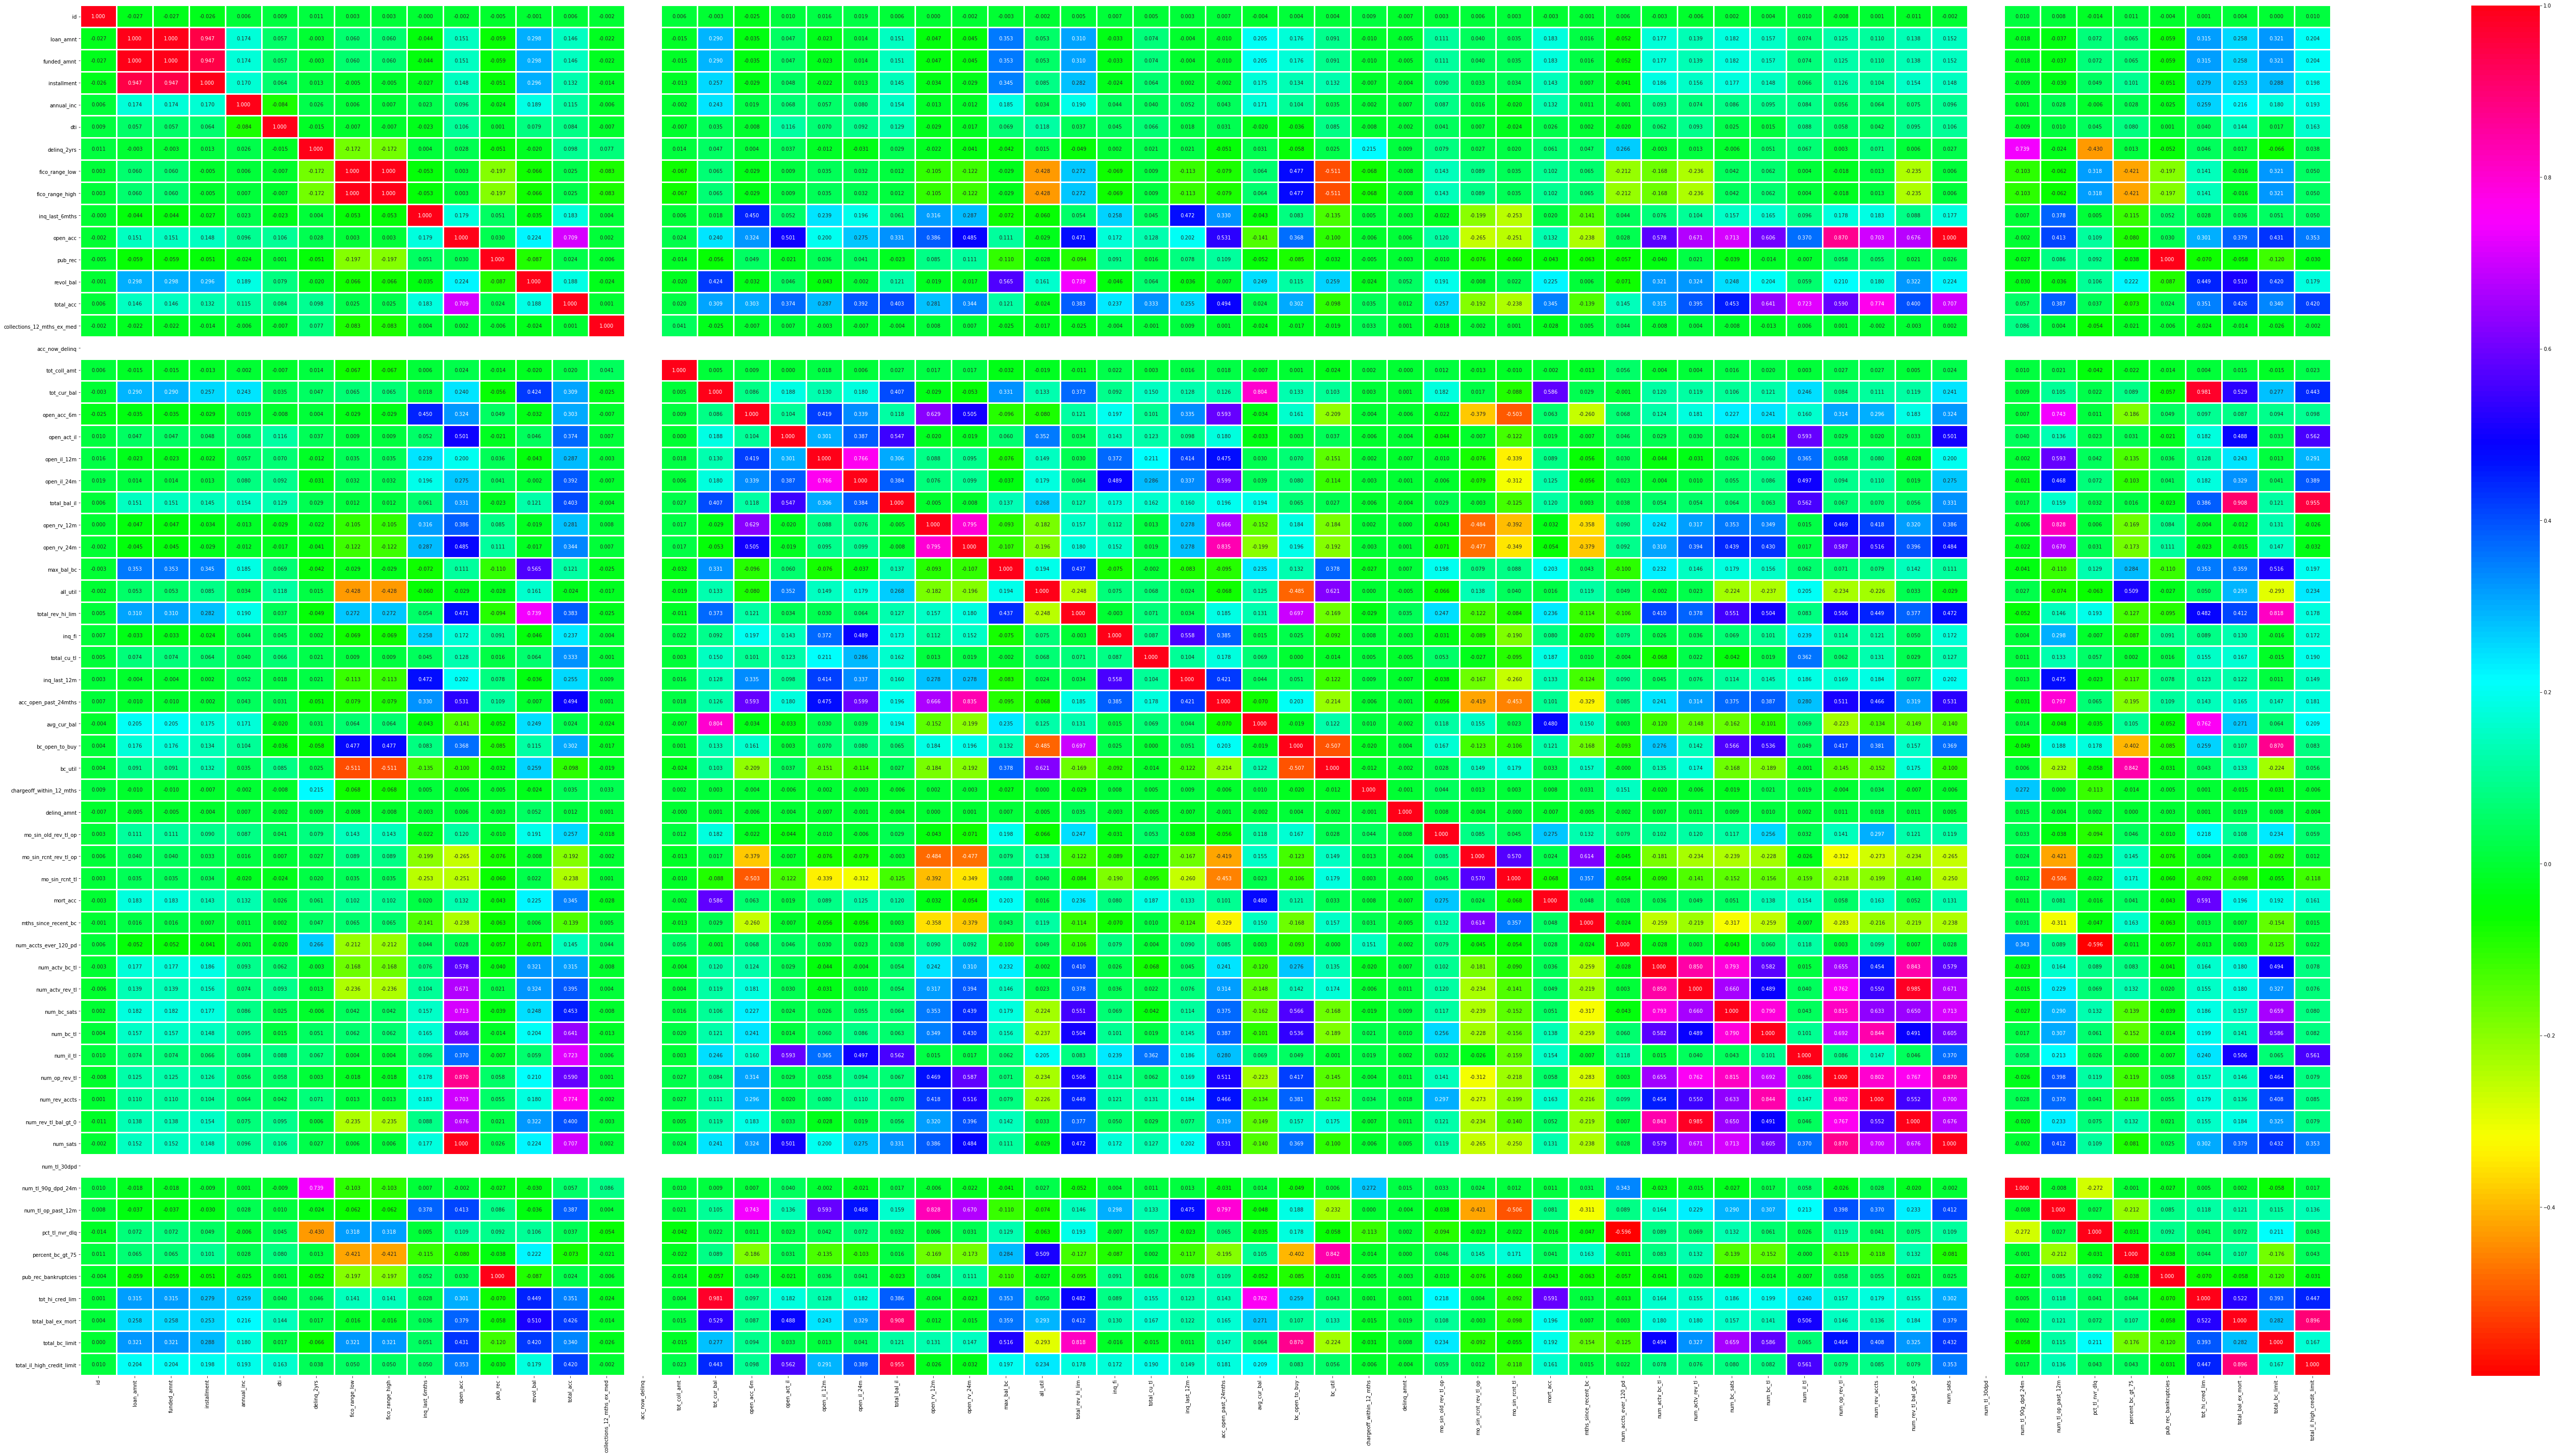

In [ ]:
#Heatmap of Corr
print("\n")
print("<---------------Heatmap------------------>")
plt.figure(figsize=(100,50))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [ ]:
# Some EDA

# LOAN STATUS VARIABLE
status = {'Charged Off':0, 'Fully Paid': 1}
df['loan_status'] = df['loan_status'].map(status)

# FICO VARIABLE
df[['fico_range_low','fico_range_high']].corr()
df['fico'] = 0.5*df['fico_range_low'] + 0.5*df['fico_range_high']
df['fico'] = df['fico'].astype(int)
df.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)


# REVOL BAL AND REVOL UTIL VARIABLE
df['revol_bal'] = df['revol_bal'].astype(str)
df['revol_bal'] = df['revol_bal'].str.replace('%', '')
df['revol_bal'] = df['revol_bal'].astype(float)

df['revol_util'] = df['revol_util'].astype(str)
df['revol_util'] = df['revol_util'].str.replace('%', '')
df['revol_util'] = df['revol_util'].astype(float)
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)

# INTREST RATE
df['int_rate'] = df['int_rate'].str.replace('%', '')

# bc_open_to_buy
df['bc_open_to_buy'].fillna(df['bc_open_to_buy'].mean(), inplace=True)

#avg_cur_bal
df['avg_cur_bal'].fillna(df['avg_cur_bal'].mean(), inplace=True)

#bc_util
df['bc_util'].fillna(df['bc_util'].mean(), inplace=True)

#percent_bc_gt_75
df['percent_bc_gt_75'].fillna(df['percent_bc_gt_75'].mean(), inplace=True)

#all_util
df['all_util'].fillna(df['all_util'].mean(), inplace=True)

#tot_hi_cred_lim
df['tot_hi_cred_lim'].fillna(df['tot_hi_cred_lim'].mean(), inplace=True)

#total_bc_limit 
df['total_bc_limit'].fillna(df['total_bc_limit'].mean(), inplace=True)

In [ ]:
correlations = df.corrwith(df["loan_status"])
correlations

id                            0.021781
loan_amnt                    -0.094960
funded_amnt                  -0.094960
installment                  -0.105479
annual_inc                    0.016557
loan_status                   1.000000
dti                          -0.024319
delinq_2yrs                  -0.013522
inq_last_6mths               -0.038154
open_acc                      0.020158
pub_rec                       0.007408
revol_bal                     0.002514
revol_util                   -0.090659
total_acc                     0.066611
collections_12_mths_ex_med   -0.015929
acc_now_delinq                     NaN
tot_coll_amt                 -0.005997
tot_cur_bal                   0.086235
open_acc_6m                  -0.016010
open_act_il                   0.033098
open_il_12m                   0.022205
open_il_24m                   0.036805
total_bal_il                  0.032317
open_rv_12m                  -0.023782
open_rv_24m                  -0.031798
max_bal_bc               

In [ ]:
abs_corrs = correlations.abs()
high_correlations = abs_corrs[abs_corrs > 0.05].index.values.tolist()
high_correlations

['loan_amnt',
 'funded_amnt',
 'installment',
 'loan_status',
 'revol_util',
 'total_acc',
 'tot_cur_bal',
 'all_util',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mort_acc',
 'num_actv_rev_tl',
 'num_il_tl',
 'num_rev_tl_bal_gt_0',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'fico']

In [ ]:
new_df = df.loc[:, ['loan_amnt',
 'funded_amnt',
 'installment',
 'loan_status',
 'revol_util',
 'total_acc',
 'tot_cur_bal',
 'all_util',
 'total_rev_hi_lim',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mort_acc',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_il_tl',
 'num_rev_tl_bal_gt_0',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bc_limit',
 'fico']]



<---------------Heatmap------------------>


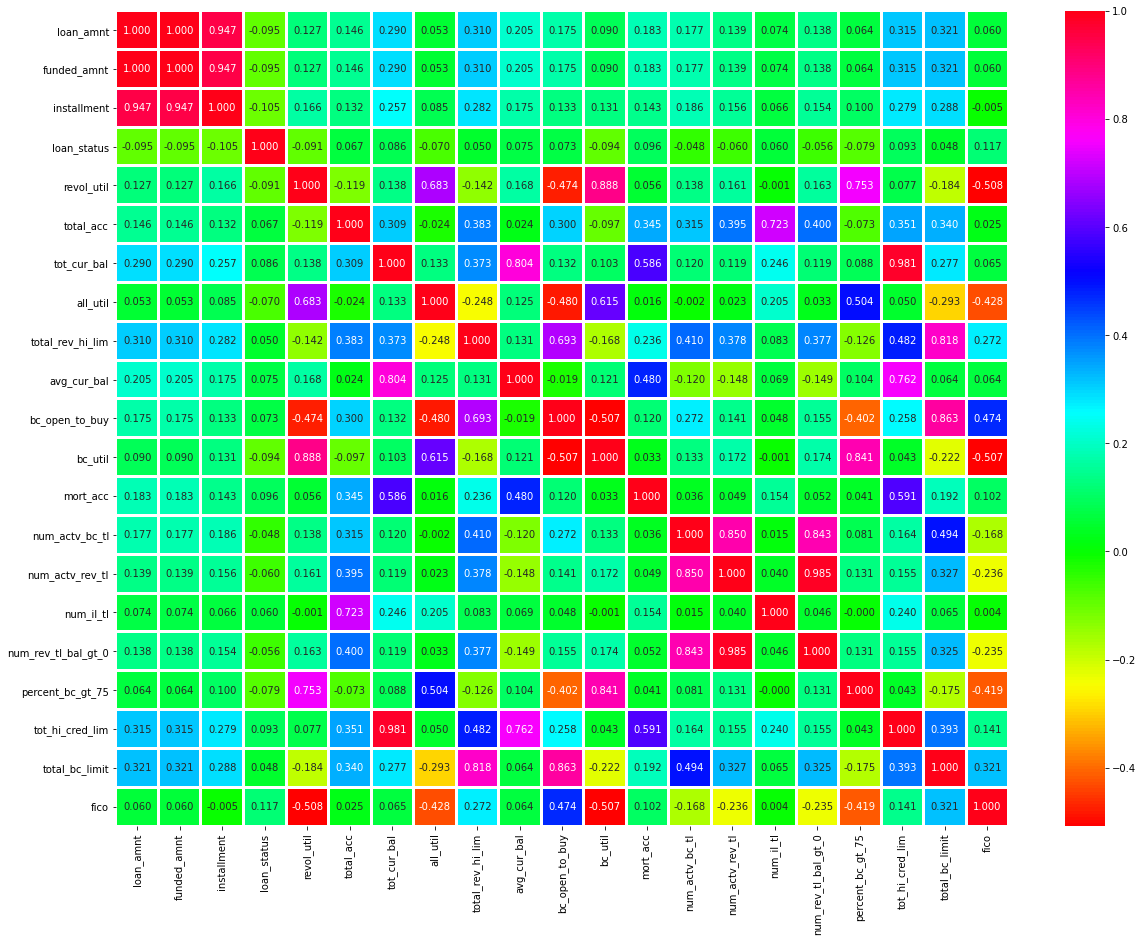

In [ ]:
#Heatmap of Corr
print("\n")
print("<---------------Heatmap------------------>")
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [ ]:
new_df.isna().sum()


loan_amnt              0
funded_amnt            0
installment            0
loan_status            0
revol_util             0
total_acc              0
tot_cur_bal            0
all_util               0
total_rev_hi_lim       0
avg_cur_bal            0
bc_open_to_buy         0
bc_util                0
mort_acc               0
num_actv_bc_tl         0
num_actv_rev_tl        0
num_il_tl              0
num_rev_tl_bal_gt_0    0
percent_bc_gt_75       0
tot_hi_cred_lim        0
total_bc_limit         0
fico                   0
dtype: int64

In [ ]:
new_df.sample(5)

,loan_amnt,funded_amnt,installment,loan_status,revol_util,total_acc,tot_cur_bal,all_util,total_rev_hi_lim,avg_cur_bal,bc_open_to_buy,bc_util,mort_acc,num_actv_bc_tl,num_actv_rev_tl,num_il_tl,num_rev_tl_bal_gt_0,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,fico
11515,10000,10000,331.19,1,46.6,22,16001,58.0,17500,1333.0,4001.0,48.0,1,2,6,3,6,0.0,27500.0,7700.0,662
16028,14000,14000,302.45,1,52.9,15,119265,53.0,25300,19878.0,11915.0,52.9,0,4,4,6,4,0.0,130957.0,25300.0,737
14450,14000,14000,439.94,1,22.0,41,299130,41.0,56600,16618.0,41456.0,23.1,6,1,1,13,1,10.0,373135.0,53900.0,742
7251,35000,35000,976.64,1,35.4,42,418438,56.0,39200,19020.0,23835.0,36.8,6,8,8,19,8,8.3,493701.0,37700.0,697
9497,24000,24000,794.86,1,15.2,49,355939,31.0,78700,19774.0,34980.0,23.8,11,2,6,13,6,0.0,422654.0,45900.0,707


# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

X = new_df.drop('loan_status',axis=1)
y = new_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Building Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth= 5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)

# Evaluating Model

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.34      0.08      0.13      1223
           1       0.80      0.96      0.87      4625

    accuracy                           0.77      5848
   macro avg       0.57      0.52      0.50      5848
weighted avg       0.70      0.77      0.72      5848

0.7747948016415869


# Visualizing Decision Trees

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
importances = dtree.tree_.compute_feature_importances(normalize=False)
feature_names = X.columns


indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

for i in indices:
    print(feature_names[i], ':', importances[i])

installment : 0.005582424098441924
tot_hi_cred_lim : 0.004354784342987979
bc_open_to_buy : 0.0024133087975917395
num_il_tl : 0.0022825896954265894
loan_amnt : 0.0021414597160588802
bc_util : 0.0016185381801200646
total_bc_limit : 0.0012847057330494492
fico : 0.0012363457217226456
funded_amnt : 0.0008335118348811073
percent_bc_gt_75 : 0.0007023938873671984
mort_acc : 0.000597693223173248
num_actv_rev_tl : 0.0005873714591359579
avg_cur_bal : 0.0005095742738027517
num_rev_tl_bal_gt_0 : 0.00039874171867557606
total_acc : 0.00030788022286739843
total_rev_hi_lim : 0.00025341046380196935
tot_cur_bal : 0.00023938238864963592
num_actv_bc_tl : 0.0
all_util : 0.0
revol_util : 0.0


In [ ]:
features = list(new_df.columns[1:])
features

['funded_amnt',
 'installment',
 'loan_status',
 'revol_util',
 'total_acc',
 'tot_cur_bal',
 'all_util',
 'total_rev_hi_lim',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mort_acc',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_il_tl',
 'num_rev_tl_bal_gt_0',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bc_limit',
 'fico']

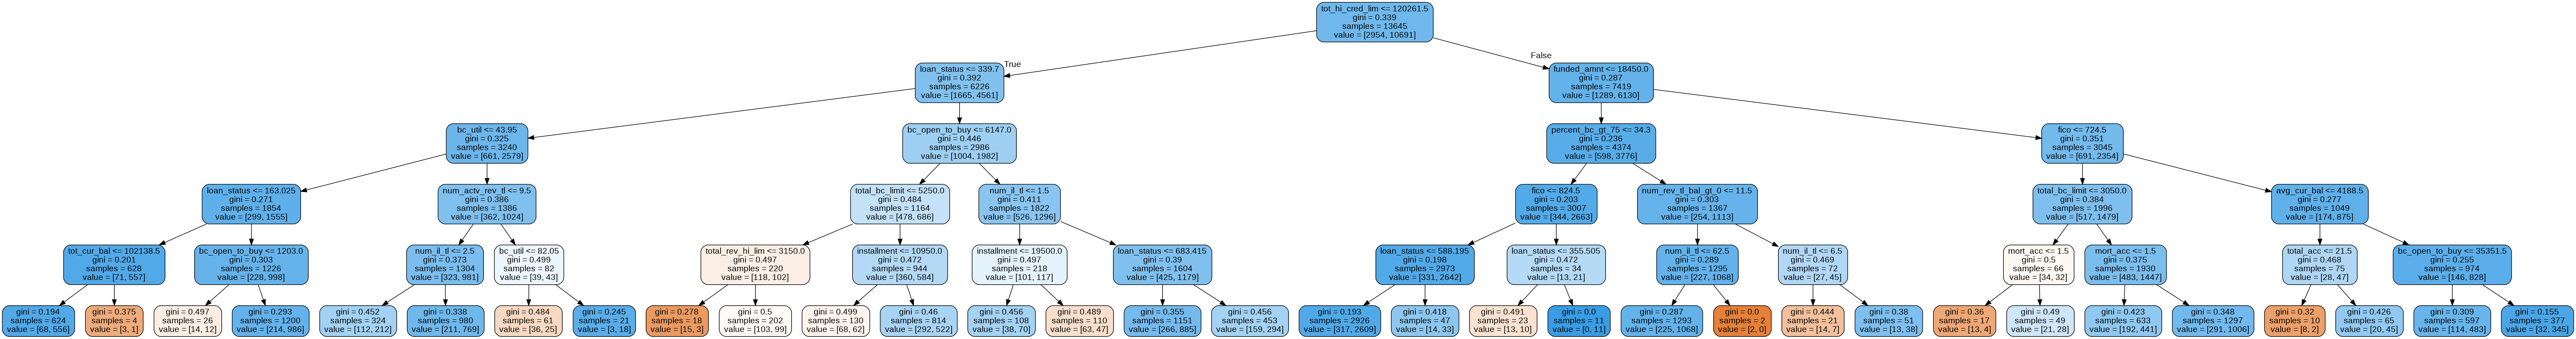

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

End of Question